In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Cargamos el dataframe de movies limpio, luego del ETL
movies_aux = pd.read_csv('Dataset/movies_aux.csv', parse_dates = ['release_date'])

In [15]:
# Ordenamos las columnas para darle una mejor representación y eliminamos las que en un principio no vamos a utilizar
# Collection: Son 1695 colecciones, nos daria una gran matriz dispersa. Dificil de manejar en Render
movies_aux = movies_aux.reindex(columns = ["id", "title", "genres", "release_date", "release_year", "popularity", "vote_average", "vote_count",
                                            "spoken_languages", "production_companies", "production_countries", "runtime", "budget", "revenue"])

In [16]:
movies_aux.head()

,id,title,genres,release_date,release_year,popularity,vote_average,vote_count,spoken_languages,production_companies,production_countries,runtime,budget,revenue
0,862.0,Toy Story,"['Animation', 'Comedy', 'Family']",1995-10-30,1995,21.946943,7.7,5415.0,['English'],['Pixar Animation Studios'],['United States of America'],81.0,30000000.0,373554033.0
1,8844.0,Jumanji,"['Adventure', 'Fantasy', 'Family']",1995-12-15,1995,17.015539,6.9,2413.0,"['English', 'Français']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],104.0,65000000.0,262797249.0
2,15602.0,Grumpier Old Men,"['Romance', 'Comedy']",1995-12-22,1995,11.712900,6.5,92.0,['English'],"['Warner Bros.', 'Lancaster Gate']",['United States of America'],101.0,0.0,0.0
3,31357.0,Waiting to Exhale,"['Comedy', 'Drama', 'Romance']",1995-12-22,1995,3.859495,6.1,34.0,['English'],['Twentieth Century Fox Film Corporation'],['United States of America'],127.0,16000000.0,81452156.0
4,11862.0,Father of the Bride Part II,['Comedy'],1995-02-10,1995,8.387519,5.7,173.0,['English'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],106.0,0.0,76578911.0


In [17]:
# Conversion para que a cada elemento lo tome como una lista (no string) y poder hacer el encoding
movies_aux["genres"] = movies_aux["genres"].apply(eval).apply(list)
# Creamos la instancia del decoder
mlb_1 = MultiLabelBinarizer()
mlb_1.fit(movies_aux["genres"])
mlb_1.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'Sin_Categoria', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype=object)

In [18]:
# Se aplico correctamente el fit, ahora transformamos la columna y lo cargamos a un df auxiliar
genres_encoded = mlb_1.transform(movies_aux["genres"])
genres_encoded = pd.DataFrame(genres_encoded, columns = mlb_1.classes_)
genres_encoded = genres_encoded.add_prefix("genres_")

In [19]:
# Borramos la columna Sin_categoria.
genres_encoded = genres_encoded.drop(columns = ["genres_Sin_Categoria"])

In [20]:
genres_encoded.sum().sort_values(ascending = False).head(8)

genres_Drama          20255
genres_Comedy         13181
genres_Thriller        7619
genres_Romance         6733
genres_Action          6592
genres_Horror          4670
genres_Crime           4305
genres_Documentary     3921
dtype: int64

In [21]:
# Conversion para que a cada elemento lo tome como una lista (no string) y poder hacer el encoding
movies_aux["spoken_languages"] = movies_aux["spoken_languages"].apply(eval).apply(list)
# Creamos la instancia del decoder
mlb_2 = MultiLabelBinarizer()
mlb_2.fit(movies_aux["spoken_languages"])
mlb_2.classes_

array(['', '?????', '??????', 'Afrikaans', 'Azərbaycan',
       'Bahasa indonesia', 'Bahasa melayu', 'Bamanankan', 'Bokmål',
       'Bosanski', 'Català', 'Cymraeg', 'Dansk', 'Deutsch', 'Eesti',
       'English', 'Español', 'Esperanto', 'Français', 'Fulfulde',
       'Gaeilge', 'Galego', 'Hausa', 'Hrvatski', 'Italiano',
       'Kinyarwanda', 'Kiswahili', 'Latin', 'Latviešu', 'Lietuvi\x9akai',
       'Magyar', 'Malti', 'Nederlands', 'No Language', 'Norsk', 'Polski',
       'Português', 'Pусский', 'Română', 'Sin_Categoria', 'Slovenčina',
       'Slovenščina', 'Somali', 'Srpski', 'Tiếng Việt', 'Türkçe', 'Wolof',
       'euskera', 'isiZulu', 'ozbek', 'shqip', 'suomi', 'svenska',
       'Íslenska', 'Český', 'ελληνικά', 'Український', 'беларуская мова',
       'български език', 'қазақ', 'עִבְרִית', 'اردو', 'العربية', 'فارسی',
       'پښتو', 'हिन्दी', 'বাংলা', 'ਪੰਜਾਬੀ', 'தமிழ்', 'తెలుగు', 'ภาษาไทย',
       'ქართული', '广州话 / 廣州話', '日本語', '普通话', '한국어/조선말'], dtype=object)

In [22]:
# spoken languages
# Se aplico correctamente el fit, ahora transformamos la columna y lo cargamos a un df auxiliar
languages_encoded = mlb_2.transform(movies_aux["spoken_languages"])
languages_encoded = pd.DataFrame(languages_encoded, columns = mlb_2.classes_)
languages_encoded = genres_encoded.add_prefix("lang_")

In [23]:
# Hacemos un top 10 con los idiomas mas importantes (abarca mas del 50% de los casos)
top_10_lang = languages_encoded.sum().sort_values(ascending = False).head(10).index.tolist()
languages_encoded = languages_encoded[top_10_lang]

In [24]:
# production_companies
movies_aux["production_companies"] = movies_aux["production_companies"].apply(eval).apply(list)     # Conversion para que a cada elemento lo tome como una lista (no string)
# Creamos la instancia del decoder
mlb_3 = MultiLabelBinarizer()
pcomp_encoded = mlb_3.fit_transform(movies_aux["production_companies"])
pcomp_encoded = pd.DataFrame(pcomp_encoded, columns = mlb_3.classes_)
pcomp_encoded = pcomp_encoded.add_prefix("pcomp_")

In [25]:
# Vimos que Columbia Pictures esta en dos columnas distintas, las concatenamos
pcomp_encoded["pcomp_Columbia Pictures Corporation"] = pcomp_encoded["pcomp_Columbia Pictures Corporation"] | pcomp_encoded["pcomp_Columbia Pictures"]
# Borramos la columna Sin_categoria y Columbia_Pictures.
pcomp_encoded = pcomp_encoded.drop(columns = ["pcomp_Sin_Categoria", "pcomp_Columbia Pictures"])

In [26]:
# Tenemos mas de 23 mil productoras y seria muy dificil de manipular. 
pcomp_encoded.shape

(45379, 23533)

In [27]:
# Hacemos un top 60 con las compañias que más peliculas han filmado
top_60_comp = pcomp_encoded.sum().sort_values(ascending = False).head(60).index.tolist()
pcomp_encoded = pcomp_encoded[top_60_comp]

In [28]:
pcomp_encoded.sum().sum()

12491

In [29]:
# production_countries
movies_aux["production_countries"] = movies_aux["production_countries"].apply(eval).apply(list)     # Conversion para que a cada elemento lo tome como una lista (no string)
# Creamos la instancia del decoder
mlb_4 = MultiLabelBinarizer()
pcountries_encoded = mlb_4.fit_transform(movies_aux["production_countries"])
pcountries_encoded = pd.DataFrame(pcountries_encoded, columns = mlb_4.classes_)
pcountries_encoded = pcountries_encoded.add_prefix("pcountries_")

In [30]:
pcountries_encoded.sum().sum()

55625

In [31]:
# Borramos la columna Sin_categoria y Columbia_Pictures.
pcountries_encoded = pcountries_encoded.drop(columns = ["pcountries_Sin_Categoria"])

In [32]:
pcountries_encoded.shape

(45379, 160)

In [33]:
# Por limitacion en el procesamiento, hacemos un top 80 con los paises que más peliculas han filmado (descartamos la mitad)
top_40_count = pcountries_encoded.sum().sort_values(ascending = False).head(40).index.tolist()
pcountries_encoded = pcountries_encoded[top_40_count]

In [34]:
# Agregamos las conversiones a "movies_aux"
movies_aux = pd.concat([movies_aux, genres_encoded, languages_encoded, pcomp_encoded, pcountries_encoded], axis = 1)
# Borramos las columnas que desanidamos
movies_aux = movies_aux.drop(columns = ["genres", "spoken_languages", "production_companies", "production_countries"])

In [35]:
# Analizamos las variables numéricas
variables_num = ["popularity", "release_year", "vote_average", "vote_count", "runtime", "budget", "revenue"]
movies_aux[variables_num].describe()

,popularity,release_year,vote_average,vote_count,runtime,budget,revenue
count,45379.000000,45379.000000,45379.000000,45379.000000,45133.000000,4.537900e+04,4.537900e+04
mean,2.926356,1991.882236,5.624079,110.089931,94.181043,4.232325e+06,1.122936e+07
std,6.009491,24.054986,1.915381,491.727295,38.340053,1.743932e+07,6.438789e+07
min,0.000000,1874.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.388835,1978.000000,5.000000,3.000000,85.000000,0.000000e+00,0.000000e+00
50%,1.130503,2001.000000,6.000000,10.000000,95.000000,0.000000e+00,0.000000e+00
75%,3.690686,2010.000000,6.800000,34.000000,107.000000,0.000000e+00,0.000000e+00
max,547.488298,2020.000000,10.000000,14075.000000,1256.000000,3.800000e+08,2.787965e+09


<Axes: xlabel='popularity'>

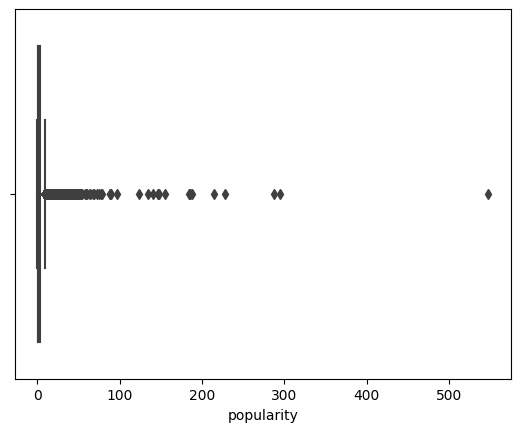

In [36]:
# Popularity
sns.boxplot(data = movies_aux, x = "popularity")

In [37]:
# Todas son películas conocidas y taquilleras, creo que estas popularidades son atípicas pero correctas
movies_aux.loc[movies_aux["popularity"] > 100, (movies_aux.loc[movies_aux["popularity"] > 200]).ne(0).any()]

,id,title,release_date,release_year,popularity,vote_average,vote_count,runtime,budget,revenue,...,lang_genres_Action,lang_genres_Crime,lang_genres_Adventure,pcomp_Warner Bros.,pcomp_Universal Pictures,pcomp_Walt Disney Pictures,pcomp_TriStar Pictures,pcomp_Working Title Films,pcountries_United States of America,pcountries_United Kingdom
292,680.0,Pulp Fiction,1994-09-10,1994,140.950236,8.3,8670.0,154.0,8000000.0,2.139288e+08,...,0,1,0,0,0,0,0,0,1,0
12476,155.0,The Dark Knight,2008-07-16,2008,123.167259,8.3,12269.0,152.0,185000000.0,1.004558e+09,...,1,1,0,1,0,0,0,0,1,1
14545,19995.0,Avatar,2009-12-10,2009,185.070892,7.2,12114.0,162.0,237000000.0,2.787965e+09,...,1,0,1,0,0,0,0,0,1,1
23649,210577.0,Gone Girl,2014-10-01,2014,154.801009,7.9,6023.0,145.0,61000000.0,3.693304e+08,...,0,0,0,0,0,0,0,0,1,0
24323,245891.0,John Wick,2014-10-22,2014,183.870374,7.0,5499.0,101.0,20000000.0,8.876166e+07,...,1,0,0,1,0,0,0,0,1,0
24427,177572.0,Big Hero 6,2014-10-24,2014,213.849907,7.8,6289.0,102.0,165000000.0,6.521054e+08,...,1,0,1,0,0,1,0,0,1,0
24844,131631.0,The Hunger Games: Mockingjay - Part 1,2014-11-18,2014,147.098006,6.6,5767.0,123.0,125000000.0,7.521002e+08,...,0,0,1,0,0,0,0,0,1,0
26531,166426.0,Pirates of the Caribbean: Dead Men Tell No Tales,2017-05-23,2017,133.827820,6.6,2814.0,129.0,230000000.0,7.941920e+08,...,1,0,1,0,0,1,0,0,1,0
26535,293660.0,Deadpool,2016-02-09,2016,187.860492,7.4,11444.0,108.0,58000000.0,7.831130e+08,...,1,0,1,0,0,0,0,0,1,0
26537,283995.0,Guardians of the Galaxy Vol. 2,2017-04-19,2017,185.330992,7.6,4858.0,137.0,200000000.0,8.634161e+08,...,1,0,1,0,0,1,0,0,1,0


In [38]:
# Runtime
# El valor maximo es correcto, corresponde a los 12 cap de la miniserie. Vamos a ver si hay más datos atipicos.
movies_aux.loc[movies_aux["runtime"] == 1256.0, (movies_aux.loc[movies_aux["runtime"] == 1256.0]).ne(0).any()]

,id,title,release_date,release_year,popularity,vote_average,vote_count,runtime,genres_Drama,genres_History,lang_genres_Drama,pcountries_United States of America
24150,67493.0,Centennial,1978-10-01,1978,0.664727,7.9,8.0,1256.0,1,1,1,1


In [63]:
# Runtime tiene valores NaN, a los desconocidos los ponemos en la mediana del valor
mediana = np.nanmedian(movies_aux["runtime"])
movies_aux["runtime"] = movies_aux["runtime"].fillna(mediana)

In [64]:
movies_aux["runtime"].isna().sum()

0

<Axes: xlabel='runtime'>

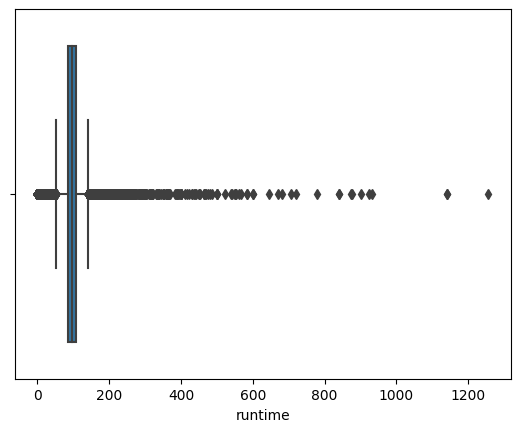

In [40]:
# Aún hay más valores por encima
sns.boxplot(data = movies_aux, x = "runtime")

In [41]:
# Son generalmente miniseries donde se toma el runtime de todos los episodios. Consideramos que los valores son correctos
movies_aux.loc[movies_aux["runtime"] > 800.0]

,id,title,release_date,release_year,popularity,vote_average,vote_count,runtime,budget,revenue,...,pcountries_Turkey,pcountries_Israel,pcountries_Romania,pcountries_Taiwan,pcountries_Portugal,pcountries_South Africa,pcountries_New Zealand,pcountries_Thailand,pcountries_Serbia,pcountries_Iran
13762,45560.0,Berlin Alexanderplatz,1980-08-28,1980,2.255785,8.4,5.0,931.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13947,67463.0,Heimat: A Chronicle of Germany,1984-09-16,1984,0.016204,9.0,1.0,925.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
19144,208988.0,The War,2007-09-23,2007,0.487489,5.3,3.0,874.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
19948,142051.0,Jazz,2001-01-09,2001,1.507756,5.7,3.0,1140.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
24150,67493.0,Centennial,1978-10-01,1978,0.664727,7.9,8.0,1256.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
26653,150004.0,Taken,2002-12-02,2002,10.628230,7.4,76.0,877.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
27825,125336.0,The Story of Film: An Odyssey,2011-09-03,2011,1.502510,8.8,26.0,900.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
34624,293603.0,The Roosevelts: An Intimate History,2014-09-15,2014,0.824032,8.3,6.0,840.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
34689,38430.0,Seventeen Moments in Spring,1973-01-01,1973,0.977018,7.4,10.0,840.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
40876,126820.0,Baseball,1994-09-18,1994,0.145073,8.5,4.0,1140.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='vote_average'>

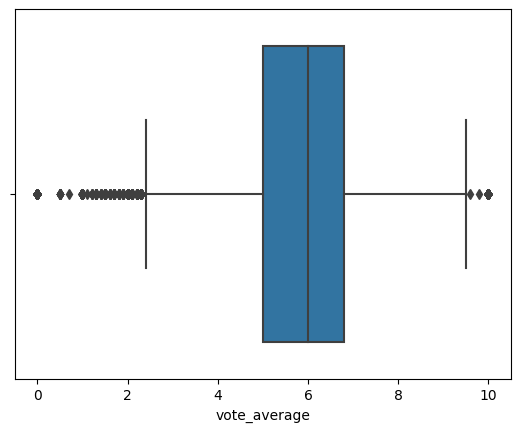

In [42]:
# vote_average
sns.boxplot(data = movies_aux, x = "vote_average")      # Los valores son de 0 a 10, están cargados correctamente

<Axes: xlabel='budget'>

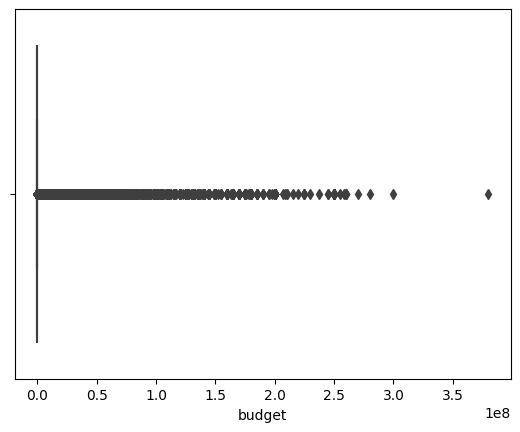

In [43]:
# budget
sns.boxplot(data = movies_aux, x = "budget")        # La inmensa mayoria de las peliculas tienen un bajo presupuesto y hay otras muy por encima

In [44]:
# Las peliculas con un gran presupuesto son valores atipicos pero correctos.
movies_aux.loc[movies_aux["budget"] > 2.5e8, "title"].tolist()

['Superman Returns',
 'Spider-Man 3',
 "Pirates of the Caribbean: At World's End",
 'Tangled',
 'Pirates of the Caribbean: On Stranger Tides',
 'John Carter',
 'The Lone Ranger',
 'Avengers: Age of Ultron',
 'Transformers: The Last Knight']

<Axes: xlabel='revenue'>

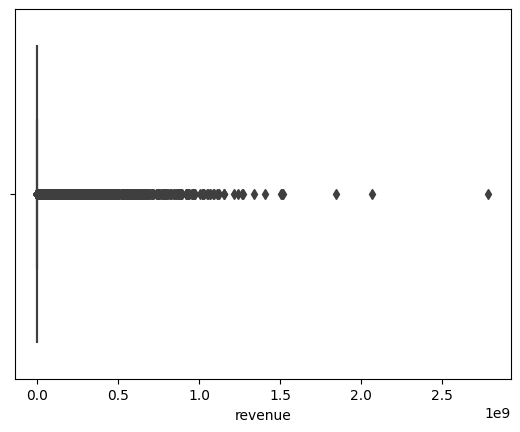

In [45]:
# revenue
sns.boxplot(data = movies_aux, x = "revenue")

In [46]:
# Las peliculas con grandes ganancias son valores atipicos pero correctos.
movies_aux.loc[movies_aux["revenue"] > 1.5e9, "title"]

1637                          Titanic
14545                          Avatar
17807                    The Avengers
25055                  Jurassic World
26526    Star Wars: The Force Awakens
28800                       Furious 7
Name: title, dtype: object

In [47]:
# Hacemos el Standard Scaler
scaler = StandardScaler()
normalizadas = scaler.fit_transform(movies_aux[variables_num])

In [48]:
movies_aux[variables_num] = pd.DataFrame(normalizadas)

In [49]:
# Veo las primeras columnas de una serie de registros y aparentemente se ha hecho bien el Standard Scaler
movies_aux.iloc[:5, :8]

,id,title,release_date,release_year,popularity,vote_average,vote_count,runtime
0,862.0,Toy Story,1995-10-30,0.129611,3.165126,1.083828,10.788436,-0.343797
1,8844.0,Jumanji,1995-12-15,0.129611,2.344514,0.666152,4.683359,0.256105
2,15602.0,Grumpier Old Men,1995-12-22,0.129611,1.462127,0.457314,-0.036789,0.177857
3,31357.0,Waiting to Exhale,1995-12-22,0.129611,0.155279,0.248476,-0.154742,0.856006
4,11862.0,Father of the Bride Part II,1995-02-10,0.129611,0.908766,0.039638,0.127938,0.308270


<Axes: >

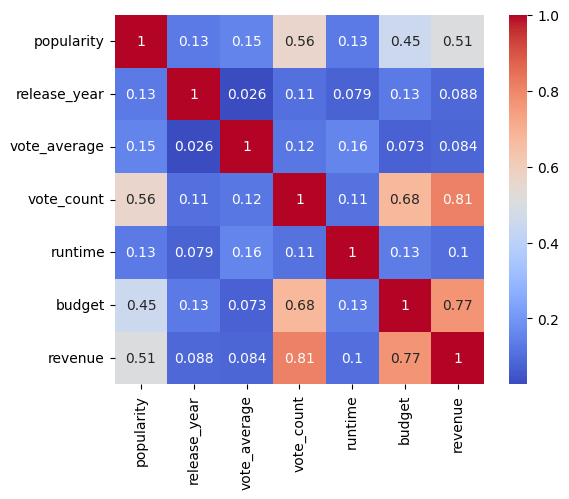

In [50]:
# Hacemos una matriz de correlacion para ver la dependencia entre nuestras variables numericas
correlation_matrix = movies_aux[variables_num].corr()

# Mapa de calor de la matriz de correlacion
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', square = True)

In [51]:
# Los guardamos en csv para ser consumidos por el algoritmo de ML
# movies_aux.to_csv('Dataset/movies_ml.csv', index = False)

In [52]:
# Importamos el algoritmo nltk para tokenizar y hacer la lematizacion y tf-id para hacer procesamiento de las overview
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Pruebas de overview
sinopsis = pd.read_csv('Dataset/movies_aux.csv', usecols = ["overview"])["overview"]

In [53]:
# Limpiamos los nan, los hacemos un string vacio
sinopsis = sinopsis.fillna("")
# Creamos una lista a partir de la Series de pandas
sinopsis = sinopsis.tolist()

In [54]:
# Cargamos una lista de 851 stop words en ingles. Fuente: https://countwordsfree.com/stopwords
stop_words = pd.read_json("Dataset\stop_words_english.json")
stop_words = stop_words[0].to_list()

In [55]:
# Tokenización de palabras
tokens = [word_tokenize(text.lower()) for text in sinopsis]      

# Lematización de palabras
lemmatizer = WordNetLemmatizer()
# Usamos las stop words en inglés de la librería
lemmatized_tokens = [[lemmatizer.lemmatize(word) for word in token_list if word not in stop_words] for token_list in tokens]        

# Convertir la lista de tokens lematizados en texto
sinopsis_lemmatized = [' '.join(token_list) for token_list in lemmatized_tokens]

In [56]:
sinopsis_lemmatized

["led woody , andy 's toy live happily room andy 's birthday brings buzz lightyear scene . afraid losing place andy 's heart , woody plot buzz . circumstance separate buzz woody owner , duo eventually learns difference .",
 "sibling judy peter discover enchanted board game open door magical , unwittingly invite alan -- adult 's trapped game 26 year -- living room . alan 's hope freedom finish game , prof risky running giant rhinoceros , evil monkey terrifying creature .",
 "family wedding reignites ancient feud next-door neighbor fishing buddy john max . , sultry italian divorcée open restaurant local bait shop , alarming local worry scare fish . 's interested seafood cooking hot time max .",
 "cheated , mistreated stepped , woman holding breath , waiting elusive `` good man '' break string less-than-stellar lover . friend confidant vannah , bernie , glo robin talk , determined breathe .",
 "george bank recovered daughter 's wedding , receives news 's pregnant ... george 's wife , nina

In [57]:
# Creamos un TfidfVectorizer con un máximo de 100 palabras
vectorizer = TfidfVectorizer(max_features = 100, stop_words = stop_words)

# Transformar y vectorizar el contenido de las sinopsis
vectores_tfidf = vectorizer.fit_transform(sinopsis_lemmatized)

c:\Users\Mauricio Figueroa\.virtualenvs\Python-env--sma9hmZ\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'al', 'couldn', 'daren', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'itse', 'll', 'mayn', 'mightn', 'mon', 'mustn', 'myse', 'needn', 'oughtn', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [58]:
# Vocabulario (son palabras únicas) aprendidas por el vectorizer
vocabulario = vectorizer.get_feature_names_out()
vocabulario

array(['american', 'attempt', 'based', 'beautiful', 'big', 'boy',
       'brother', 'child', 'city', 'comedy', 'country', 'couple', 'crime',
       'daughter', 'day', 'dead', 'death', 'decides', 'director',
       'discovers', 'documentary', 'dream', 'drug', 'escape', 'event',
       'face', 'fall', 'family', 'father', 'fight', 'film', 'force',
       'friend', 'gang', 'girl', 'girlfriend', 'good', 'group', 'head',
       'high', 'house', 'human', 'husband', 'job', 'journey', 'kill',
       'killer', 'lead', 'life', 'live', 'living', 'local', 'long',
       'love', 'man', 'meet', 'men', 'money', 'mother', 'movie', 'murder',
       'mysterious', 'named', 'night', 'order', 'parent', 'people',
       'place', 'plan', 'play', 'police', 'power', 'real', 'relationship',
       'return', 'save', 'school', 'secret', 'series', 'set', 'sister',
       'small', 'son', 'star', 'start', 'story', 'student', 'team',
       'time', 'town', 'true', 'turn', 'village', 'war', 'wife', 'woman',
       'wor

In [59]:
# Creo un dataframe de las sinopsis vectorizadas, a un maximo de 100 palabras.
vectores_sinopsis = pd.DataFrame(vectores_tfidf.toarray(), columns = vocabulario)

In [60]:
# Guardo el dataframe de sinopsis
# vectores_sinopsis.to_csv('Dataset/vectores_sinopsis.csv', index = False)